# Demo for Basic Usage

The python module `imfits` is developed for handling fits files easily. Here is a demo for the basic usage of imfits. The fits data used in this demo are all from [Sai et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...893...51S/abstract).

## Read fits file

The base object of this module is the python class `Imfits`, which reads and contains data and header information of fits files. The below is an example for cube data.

In [1]:
# import modules
import numpy as np
# if path is not set
#import sys
#sys.path.append('/PATH/TO/imfits')

from imfits import Imfits


# read cube
f = 'l1489.c18o.contsub.gain01.rbp05.mlt100.cf15.pbcor.croped.fits'
cube = Imfits(f)
print('Data dimension: %i'%cube.naxis) # Number of axes
print('Data shape: ', cube.data.T.shape) # Data are contained in 'data'
print('Axes: %s, %s, %s, %s'%tuple(cube.label_i)) # Each axis

The third axis is  FREQ
Convert frequency to velocity
Data dimension: 4
Data shape:  (400, 400, 69, 1)
Axes: RA---SIN, DEC--SIN, FREQ, STOKES


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


You can call variables associated with the fits file. Basic variables are

- xx, yy: RA and Dec offset coordinates of pixels for the FK4, FK5 and ICRS frames (deg).
- xx_wcs, yy_wcs: Absolute WCS coordinates of pixels (deg).
- data: Intensity of the fits image.
- xaxis, yaxis, vaxis: x, y and velocity axes (deg or km/s).
- restfreq: Rest frequency (Hz).

`Imfits` can also read the continuum data and the position-velocity (PV) diagram.

## Draw maps

The `drawmaps` submodule from `imfits` makes it easy to plot maps of the fits data. Belows are a few examples.


### Intensity maps

`intensitymap` from `AstroCanvas` can be used for an image with two spatial axes at a single frequency (e.g., continuum and moment maps). The simplest usage is as follows.

CAUTION	read_header: No keyword PCi_j or CDi_j are found. No rotation is assumed.


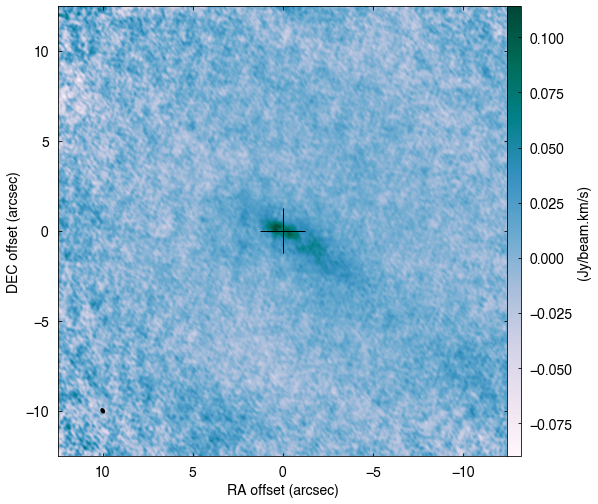

In [2]:
# import module
from imfits import drawmaps as dm

# read file
f = 'l1489.c18o.contsub.gain01.rbp05.mlt100.cf15.pbcor.mom0.trimed.fits' # moment zero map
im = Imfits(f)

# make plot
canvas = dm.AstroCanvas((1,1)) # Define a canvas where an image is plotted. Give (n_row, _col).
canvas.intensitymap(im)
plt.show()

The map can be saved to a pdf file by `canvas.savefig('filename')`. More options can be given for more detailed plot settings.

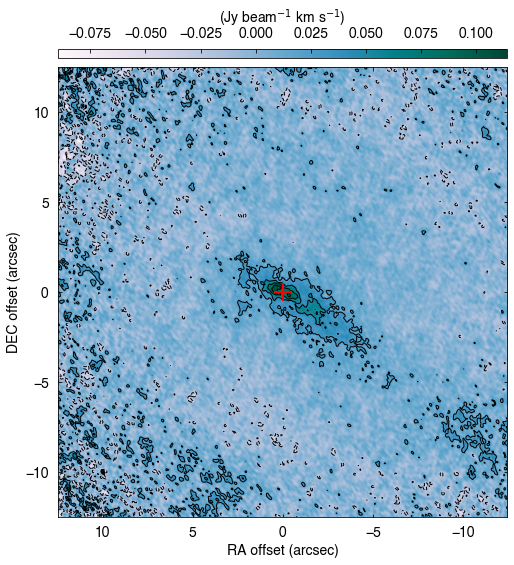

In [3]:
# rms of the map
rms = 8.e-3 # Jy/beam
# Define a canvas
canvas = dm.AstroCanvas((1,1))
# With more options
canvas.intensitymap(im, 
                    color = True, # Add color
                    cmap = 'PuBuGn', # color map
                    contour = True, # Add contour
                    clevels = np.array([-3,3,6,9,12,15.]) * rms, # contour level
                    cbarlabel = r'(Jy beam$^{-1}$ km s$^{-1}$)', # color bar label
                    cbaroptions = ['top', '2%', '2%'], # colorbar options
                    ccross = True, # Add cross at the center
                    prop_cross = [1, 2., 'r'], # Cross properties
                    )
plt.show()

The data can be editted before making plots. Particularly, trimming data makes the plot speed much faster when the data size is huge.

CAUTION	read_header: No keyword PCi_j or CDi_j are found. No rotation is assumed.


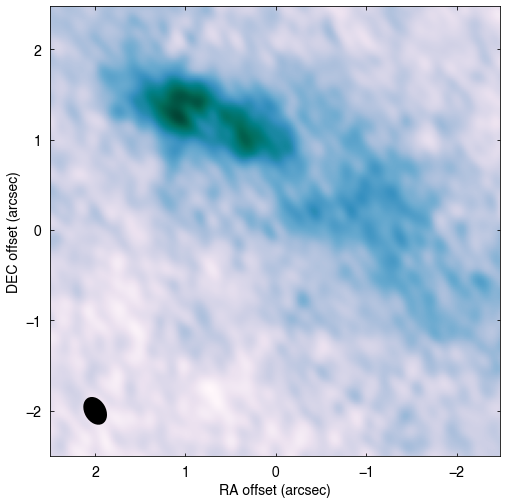

In [4]:
# fits file
f = 'l1489.c18o.contsub.gain01.rbp05.mlt100.cf15.pbcor.mom0.trimed.fits'
# new center
center = '4h4m43.02s 26d18m55s'


# read file
im = Imfits(f)
# shift map center
im.shift_coord_center(center)
# trim image
im.trim_data([-2.5,2.5], [-2.5,2.5]) # give xlim, ylim in arcsec


# plot
canvas = dm.AstroCanvas((1,1))
canvas.intensitymap(im, ccross=False, colorbar=False)
plt.show()

`AstroCanvas` is working like a wrapper of `matplotlib.pyplot` and contains a figure and axes of `matplotlib`. Therefore, by calling them, more flexible plots can be done.

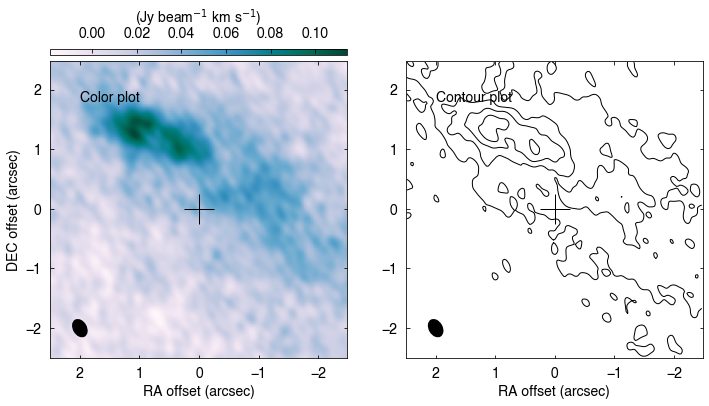

In [11]:
rms = 8.e-3 # Jy/beam

# two plots side by side
canvas = dm.AstroCanvas((1,2))
canvas.intensitymap(im, 
                    iaxis=0, # index of panel
                    color=True, # color plot
                    contour=False, # contour plot
                    cbarlabel=r'(Jy beam$^{-1}$ km s$^{-1}$)', # color bar label
                    cbaroptions=['top', '2%', '2%'], # colorbar options
                    )
canvas.intensitymap(im, 
                    iaxis=1, # index of panel
                    color=False, # color plot
                    contour=True, # contour plot
                    clevels=np.array([-3.,3.,6.,9.,12.,15.])*rms, # contour level,
                    cbarlabel=r'(Jy beam$^{-1}$ km s$^{-1}$)', # color bar label
                    cbaroptions=['top', '2%', '2%'], # colorbar options
                    )
canvas.axes[1].set_ylabel('') # off ylabel

# add something by yourself
ax1 = canvas.axes[0]
ax1.text(0.1, 0.9, 'Color plot',
       ha='left', va='top', transform=ax1.transAxes)
ax2 = canvas.axes[1]
ax2.text(0.1, 0.9, 'Contour plot',
       ha='left', va='top', transform=ax2.transAxes)

# save figure
#canvas.savefig('momentzero', ext='pdf')
# show
plt.show()